In [2]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [3]:
with open('/home/aka/Documents/DataWrangling/df_features_train_kb.pickle', 'rb') as f:
    df_train4 = pickle.load(f)

df_train4.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_141-041-050,1,-409.116791,69.531013,56.376720,42.255375,31.553745,24.275185,18.532675,13.423857,9.344967,...,0.084849,0.175900,0.819804,0.144161,0.070890,0.038794,0.052259,0.023774,0.060006,0.0
bass_electronic_021-051-100,0,-511.717255,36.044266,24.325424,18.754953,14.956080,10.883185,6.117507,1.279071,-1.339385,...,0.849963,0.075981,0.046074,0.038909,0.048514,0.038605,0.044220,0.081513,0.061887,0.0
bass_synthetic_080-070-075,1,-495.121735,17.697426,3.997191,-2.675772,-5.213784,-5.764309,-5.587150,-5.792887,-5.970635,...,0.129189,0.131936,0.127206,0.168562,0.116394,0.044884,0.229673,0.521629,0.264406,0.0
bass_synthetic_085-098-127,1,-355.375946,-28.508917,-35.368931,57.153599,-22.826521,10.271304,-38.730553,6.995968,12.586042,...,0.093161,0.217482,0.154719,0.051625,0.078636,0.320729,0.019313,0.002233,0.135237,0.0
bass_electronic_016-058-025,1,-505.167358,26.149422,17.506334,15.978201,11.623926,7.589797,3.944977,1.205248,-1.366086,...,0.099011,0.075137,0.088636,0.114205,0.094625,0.088856,0.117913,0.778585,0.126127,0.0


In [5]:
df_train4.shape

(8000, 188)

In [6]:
with open('/home/aka/Documents/DataWrangling/df_features_test_kb.pickle', 'rb') as f:
    df_test4 = pickle.load(f)

df_test4.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_033-048-025,1,-438.178650,71.607910,58.217854,40.955688,24.736628,12.813897,5.880034,2.619494,1.052201,...,0.031533,0.032734,0.023594,0.039088,0.022063,0.043137,0.049210,0.037647,0.139275,0.0
bass_synthetic_098-087-025,0,-555.923157,50.874107,39.864758,34.287315,31.961660,29.768579,27.211401,23.670527,20.167419,...,0.278920,0.271300,0.243733,0.290458,0.253115,0.252768,0.221153,0.177150,0.129004,0.0
bass_electronic_018-041-050,0,-487.216492,86.863983,68.628281,52.285748,37.300919,23.525389,12.262171,3.197381,-3.443352,...,0.073792,0.118656,0.699086,0.096640,0.045692,0.046418,0.065768,0.049174,0.064092,0.0
bass_electronic_025-032-075,0,-461.743408,52.403461,47.500557,45.281574,40.763142,35.705200,31.699780,27.053719,22.536587,...,0.009445,0.009044,0.018067,0.054006,0.159346,0.836835,0.347058,0.072493,0.035956,0.0
bass_synthetic_033-030-050,0,-461.056091,77.141785,70.107773,59.749378,47.722881,35.709435,25.050844,16.538420,10.387195,...,0.019251,0.079591,0.211009,0.775182,0.170313,0.032141,0.012632,0.000000,0.000000,0.0


In [7]:
# Applying the method
check_nan = df_test4.isnull().values.any()

# printing the result
print(check_nan)

True


In [8]:
df_test4.drop(df_test4[df_test4.isna().any(axis=1)].index, inplace=True)

In [9]:
df_train4.drop(df_train4[df_train4.isna().any(axis=1)].index, inplace=True)

In [10]:
#get training and testing data
X_train4 = df_train4.drop(labels=['targets'], axis=1)
y_train4 = df_train4['targets']

X_test4 = df_test4.drop(labels=['targets'], axis=1)
y_test4 = df_test4['targets']

In [11]:
y_train4

bass_synthetic_141-041-050     0.0
bass_electronic_021-051-100    0.0
bass_synthetic_080-070-075     0.0
bass_synthetic_085-098-127     0.0
bass_electronic_016-058-025    0.0
                              ... 
vocal_acoustic_003-039-127     8.0
vocal_synthetic_012-099-127    8.0
vocal_acoustic_026-055-127     8.0
vocal_acoustic_022-066-127     8.0
vocal_synthetic_000-073-127    8.0
Name: targets, Length: 7000, dtype: float64

# Naive Bayes

In [11]:
#instantiate the classifier
clf_NB4 = GaussianNB()

#fit to training data
clf_NB4.fit(X_train4, y_train4)

GaussianNB()

In [12]:
y_pred_NB4 = clf_NB4.predict(X_test4)

In [13]:
accuracy_NB4 = np.mean(y_pred_NB4 == y_test4)
print("The accuracy of Naive Bayes is {0:.2%}".format(accuracy_NB4))

The accuracy of Naive Bayes is 29.64%


In [97]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred).astype(int)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes)
           #ylabel='Eje de datos reales',
           #xlabel='Eje de predicción')
    ax.set_title(title, pad=20,loc='center')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [102]:
class_names4=np.array(['bass', 'brass', 'flute', 
                       'guitar', 'mallet', 'organ',
                       'string', 'synth_lead','vocal'])

Normalized confusion matrix
[[0.05   0.025  0.     0.275  0.0125 0.6    0.0375]
 [0.0375 0.3125 0.     0.025  0.     0.4    0.225 ]
 [0.0375 0.25   0.125  0.2125 0.05   0.325  0.    ]
 [0.     0.25   0.025  0.1125 0.05   0.5625 0.    ]
 [0.025  0.3125 0.1    0.1625 0.1625 0.175  0.0625]
 [0.     0.075  0.     0.05   0.0125 0.8625 0.    ]
 [0.0875 0.15   0.0625 0.0625 0.1    0.0875 0.45  ]]


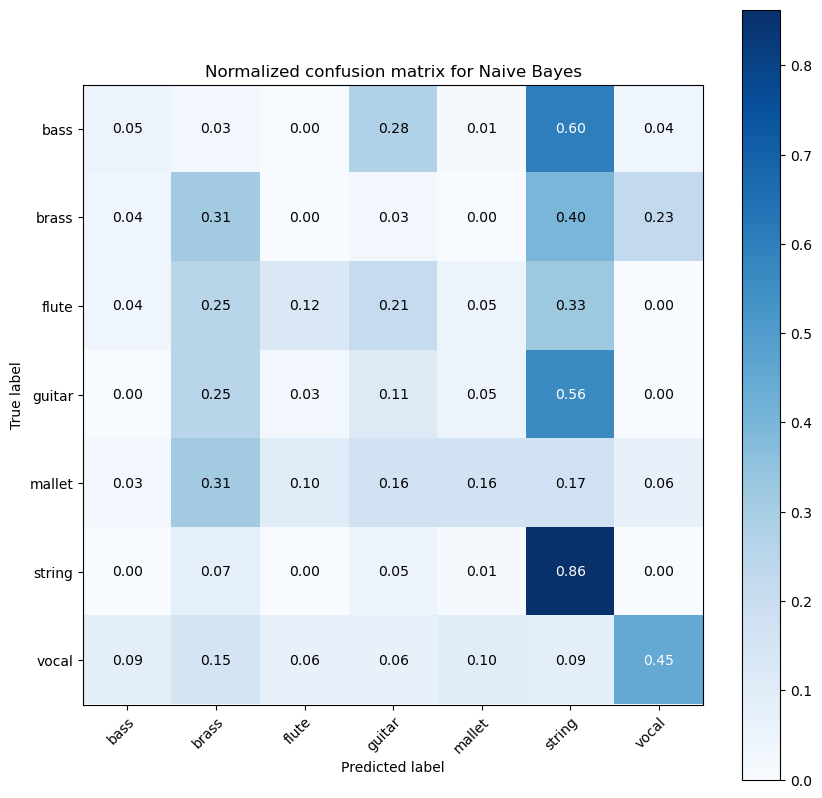

In [16]:
plot_confusion_matrix(y_test4, y_pred_NB4, classes=class_names4, normalize=True,
                      title='Normalized confusion matrix for Naive Bayes')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/NB_normalized_kb.png')

# Random Forests

In [32]:
#instantiate the random forest
clf_Rf4 =RandomForestClassifier(n_estimators=20, max_depth=50, warm_start=True)

In [33]:
clf_Rf4.fit(X_train4, y_train4)

RandomForestClassifier(max_depth=50, n_estimators=20, warm_start=True)

In [34]:
y_pred_Rf4 = clf_Rf4.predict(X_test4)

In [35]:
accuracy_Rf4 = np.mean(y_pred_Rf4 == y_test4)
print("The accuracy of Random Forest is {0:.2%}".format(accuracy_Rf4))

The accuracy of Random Forest is 66.25%


Normalized confusion matrix
[[0.725  0.     0.     0.1625 0.0875 0.0125 0.0125]
 [0.05   0.625  0.025  0.     0.     0.0625 0.2375]
 [0.05   0.     0.85   0.0625 0.0125 0.     0.025 ]
 [0.3875 0.0625 0.0125 0.4625 0.0375 0.025  0.0125]
 [0.15   0.1    0.0625 0.025  0.5375 0.05   0.075 ]
 [0.075  0.0125 0.0125 0.0625 0.0125 0.825  0.    ]
 [0.175  0.075  0.1    0.025  0.     0.0125 0.6125]]


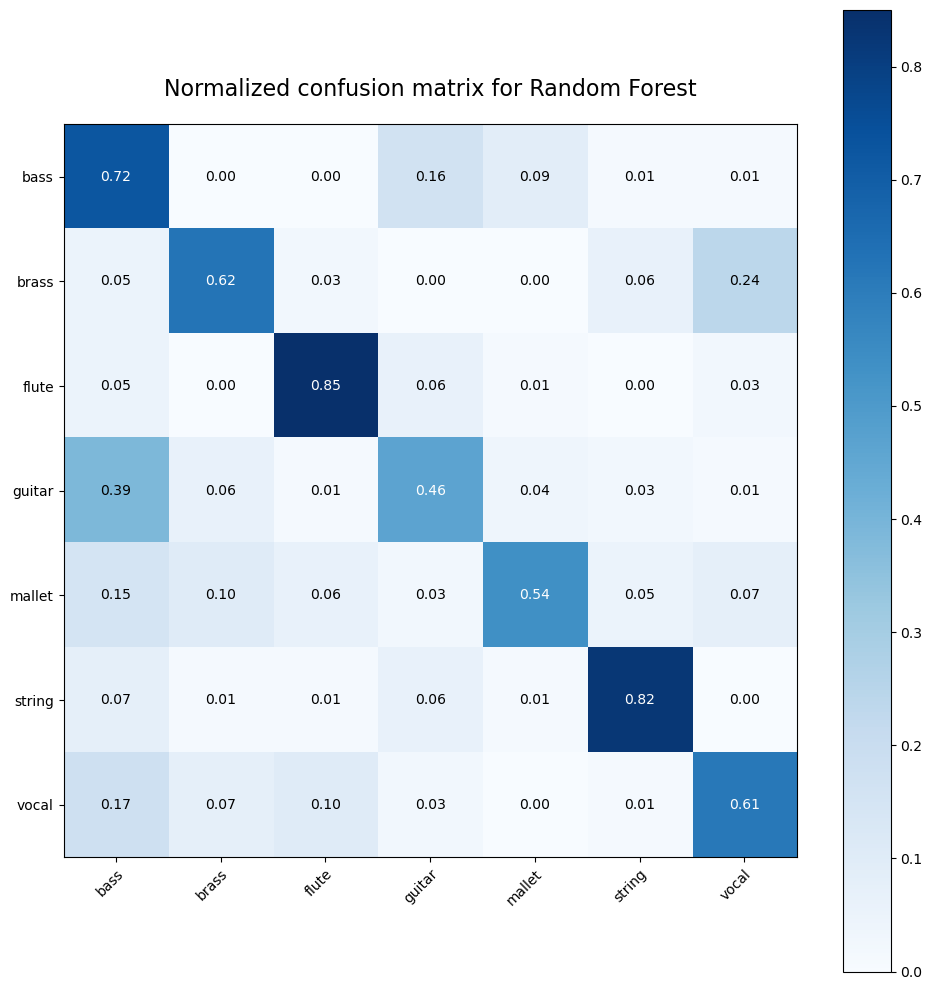

In [103]:
plot_confusion_matrix(y_test4, y_pred_Rf4, classes=class_names4, normalize=True,
                      title='Normalized confusion matrix for Random Forest')

plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/RF_Normalized_kb.png')

# SVM

In [33]:
#instantiate the sclaer
scaler4 = MinMaxScaler()

In [34]:
#scale the feature space
X_train_scale4 = scaler4.fit_transform(X_train4)
X_test_scale4 = scaler4.fit_transform(X_test4)

In [35]:
#instatiate the  classifier
clf_svm4 = SVC(C=0.1)

In [36]:
clf_svm4.fit(X_train_scale4, y_train4)

SVC(C=0.1)

In [39]:
y_pred_svm4 = clf_svm4.predict(X_test4)
accuracy_svm4 = np.mean(y_pred_svm4 == y_test4)
print("The accuracy of SVMs is {0:.2%}".format(accuracy_svm4))

/home/aka/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


The accuracy of SVMs is 14.29%


In [40]:
#display non normalized confusion matrix
confusion_matrix(y_test4, y_pred_svm4)

array([[ 0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0, 80],
       [ 0,  0,  0,  0,  0,  0, 80]])

Normalized confusion matrix
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


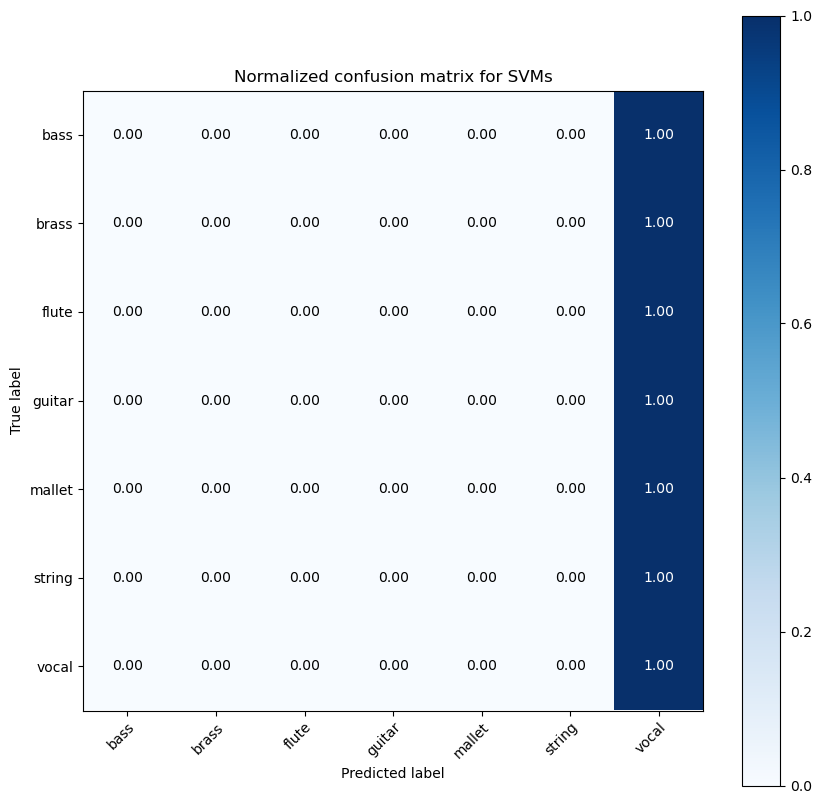

In [41]:
plot_confusion_matrix(y_test4, y_pred_svm4,classes=class_names4, normalize=True,
                      title='Normalized confusion matrix for SVMs')
plt.savefig('/home/aka/Documents/DataWrangling/ConfusionMatrix/SVM_Normalized_kb.png')